> Игорь Сорочан DSU-31

# Домашнее задание `"Центральная предельная теорема и статистика"`

## Уровень 0:


### Задание 1

В магазин привезли устройства с 3-х разных предприятий. 

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. 

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [4]:
### YOUR CODE/SOLUTION HERE
supl_ = {"a":.2,"b":.3,"c":.5}
qual_ = {"a":.1,"b":.05,"c":.2}
prob = 0
for k,v in supl_.items():
    prob += v * qual_[k]
print(f"Prob = {prob:.01%}")

Prob = 13.5%


### Задание 2


Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

In [ ]:
### YOUR SOLUTION HERE

## Уровень 1:

### Задание 3


Изучите 3 распределения из библиотеки scipy: [Нормальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), [Экспоненциальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html), [Стьюдента](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Используя функцию плотности распредления (`pdf`), постройте пять графиков плотностей для каждого распределения при разных параметрах. Запишите ваши наблюдения: как и на что влияют параметры у каждого распределения. 

Дополнительная информация [тут](https://pythonguides.com/scipy-stats/).

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns


### `Normal distribution`

0.03329999117926597
0.033285967907536705
0.03321098049901461
0.033299991179265936
0.03172511469209903


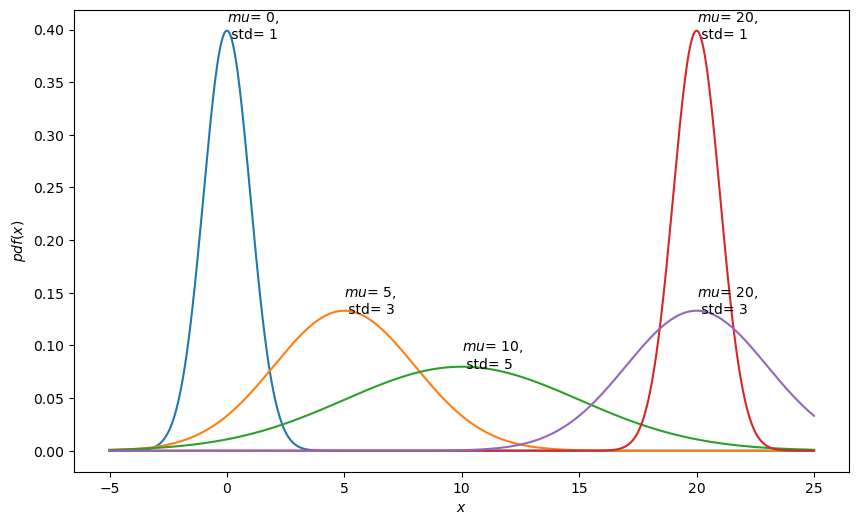

In [139]:
n1 = [(0,1),(5,3),(10,5), (20,1), (20,3)]
x = np.linspace(-5,25,1000)

fig, ax = plt.subplots(figsize=(10,6))
for k in range(len(n1)):

    rv = sts.norm(loc= n1[k][0], scale= n1[k][1])
    y= rv.pdf(x)
    sns.lineplot(x=x, y= y )  
    plt.text(x= n1[k][0], y=y.max()*.98, s= f'$mu$= {n1[k][0]},\n std= {n1[k][1]}')  

plt.ylabel('$pdf(x)$')
plt.xlabel('$x$')
plt.show() 

The smaller the standard deviation the greater is pdf(probability density function) maximum. 

### `Student distribution`

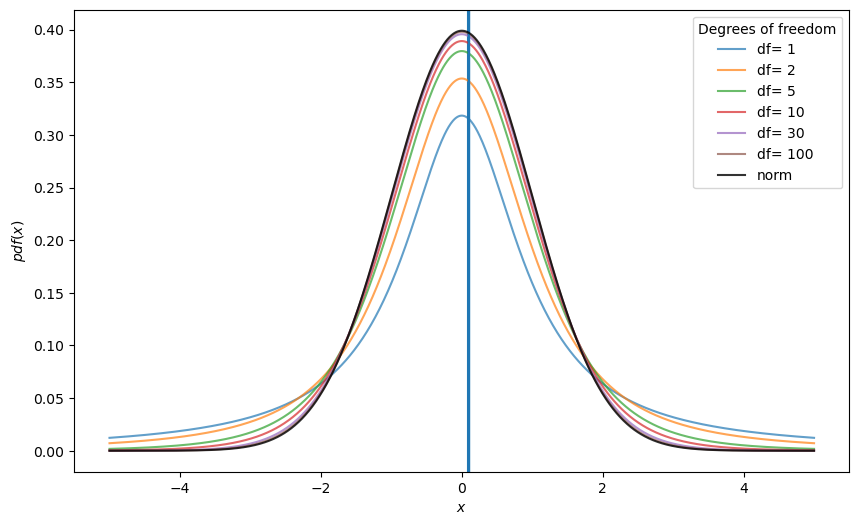

In [170]:
n1 = [(1,0),(2,0),(5,0),(10,0),(30,0),(100,0)]
x = np.linspace(-5,5,1000)

fig, ax = plt.subplots(figsize=(10,6))
for k in range(len(n1)):

    rv = sts.t(df= n1[k][0],loc=n1[k][1])
    y= rv.pdf(x)
    sns.lineplot(x=x, y= y, alpha=.7 , label= f'df= {n1[k][0]} ')  
    # plt.text(x= 0, y=y.max()*.99, s= f'$df$= {n1[k][0]}') 
    
sns.lineplot(x=x, y= sts.norm.pdf(x), alpha=.8 , color= 'k',label="norm") 
plt.legend(title= "Degrees of freedom") 
plt.ylabel('$pdf(x)$')
plt.xlabel('$x$')
plt.show() 

For n greater than 30, the student's distribution becomes similar to the normal distribution

### `Exponential distribution`

0.1392920235749422
0.22119921692859515
0.3934693402873666
0.6321205588285577
0.9179150013761012


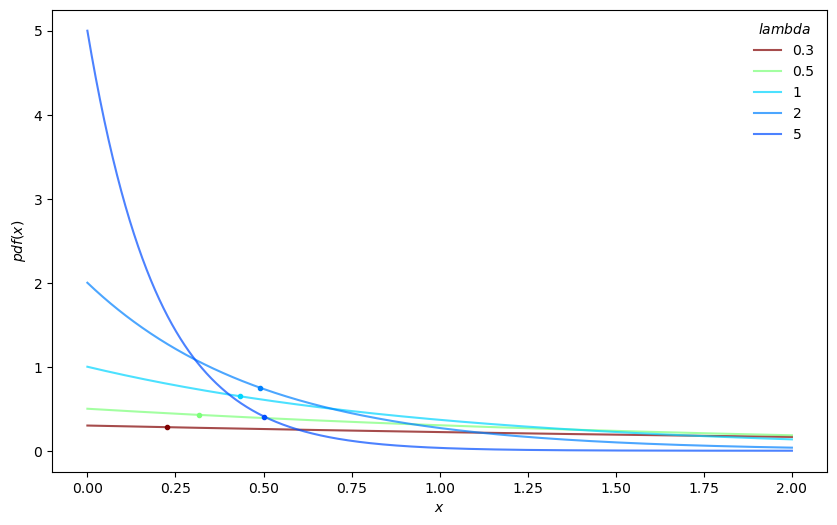

In [204]:
lambda_ = [(0.3,0),(0.5,0),(1,0),(2,0),(5,0)] # number of events per time unit(x)
x = np.linspace(0,2,1000)

fig, ax = plt.subplots(figsize=(10,6))
for k in range(len(lambda_)):

    rv = sts.expon(scale= 1 / lambda_[k][0])
    y= rv.pdf(x)
    print(rv.cdf(.5))
    sns.lineplot(x=x, y= y, alpha=.7, label= str(lambda_[k][0]), color= plt.cm.jet(1/(k+1)))  
    # plt.axvline(x=y.mean(), color= plt.cm.jet(1/(k+1)) )
    plt.plot(y.mean(),rv.pdf(y.mean()), marker="o", markersize=3,color= plt.cm.jet(1/(k+1)) )
ax.legend(loc='best', frameon=False, title = "$lambda$")
plt.ylabel('$pdf(x)$')
plt.xlabel('$x$')
plt.show() 

$lambda$ represents the events per unit time and x represents the time. 

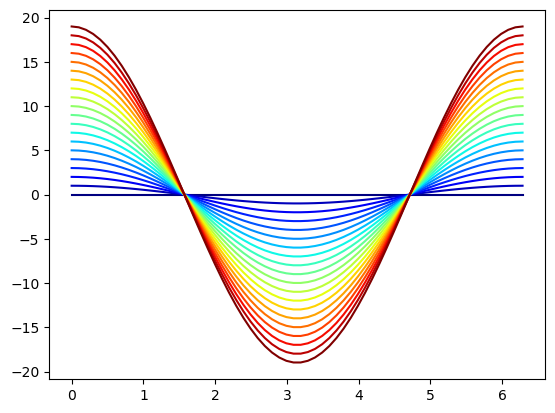

In [176]:
x = np.linspace(0, 2*np.pi, 64)
y = np.cos(x) 

n = 20
ax = plt.axes()
ax.set_prop_cycle('color',[plt.cm.jet(i) for i in np.linspace(0, 1, n)])

for i in range(n):
    plt.plot(x, i*y)